## Set up

In [67]:
%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from dna_features_viewer import GraphicFeature, GraphicRecord
import os

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-notebook'
pd.set_option('precision', 2)
pd.set_option('max_columns',10)

## Coverage map for BK-Nextera

In [69]:
# import files

input_files = []
path = os.listdir()
for file in path:
    if file.endswith("-coverage.csv"):
        input_files.append(file)    
def firstnumber(file):
    return file[:2]
input_files.sort(key=firstnumber)
print(input_files)
len(input_files)

['UBK007-coverage.csv', 'UBK024-coverage.csv', 'UBK062-coverage.csv', 'UBK088-coverage.csv', 'UBK096-coverage.csv', 'UBK121-coverage.csv', 'UBK161-coverage.csv', 'UBK178-coverage.csv', 'UBK264-coverage.csv', 'UBK265-coverage.csv', 'UBK266-coverage.csv', 'UBK282-coverage.csv']


12

In [70]:
# Create a list of files for loop later
list = []

for i in range(0,len(input_files)):
    dfname = 'df' + str(i)
    tempdf = pd.read_csv(input_files[i], index_col='Position')
    tempdf = tempdf.rename(columns={"Coverage": input_files[i]})
    #tempdf = tempdf.iloc[1000:,]
    tempdf_norm = ((tempdf/tempdf.mean()))
    list.append(tempdf_norm)
len(list)

12

In [71]:
# Merge the files into metadata table
dfmerge = pd.merge(list[0],list[1], left_index=True, right_index=True, how='outer')
for i in range(2,len(list)):
    dfmerge = pd.merge(dfmerge,list[i], left_index=True, right_index=True, how='outer')   
dfmerge.fillna(method='ffill', inplace=True)
dfmerge.head()

,UBK007-coverage.csv,UBK024-coverage.csv,UBK062-coverage.csv,UBK088-coverage.csv,UBK096-coverage.csv,...,UBK178-coverage.csv,UBK264-coverage.csv,UBK265-coverage.csv,UBK266-coverage.csv,UBK282-coverage.csv
Position,,,,,,,,,,,
1,1.75,1.04,2.01,1.76,3.23,...,1.51,1.39,0.93,1.03,3.20
2,1.73,1.02,2.00,1.71,3.21,...,1.51,1.37,0.93,1.03,3.16
3,1.73,1.02,2.00,1.71,3.20,...,1.51,1.37,0.92,1.03,3.16
4,1.72,1.00,1.99,1.69,3.18,...,1.51,1.36,0.92,1.03,3.15
5,1.72,1.00,1.98,1.69,3.18,...,1.50,1.37,0.92,1.02,3.15


In [54]:
#dfmerge.to_csv('coverage_table.csv')

In [72]:
# Edit sample name
samples = dfmerge.columns
samples = samples.str[:-13]
samples

Index(['UBK007', 'UBK024', 'UBK062', 'UBK088', 'UBK096', 'UBK121', 'UBK161',
       'UBK178', 'UBK264', 'UBK265', 'UBK266', 'UBK282'],
      dtype='object')

In [82]:
# open data file for junctions
xyz = pd.read_excel('xyz-2.xlsx')
xyz = xyz.set_index('sample')
xyz

,x,y,reads,percent,name,Unnamed: 6
sample,,,,,,
1,2805,5068,898,24.3,7,0
2,3059,4950,196,9.0,24,1
3,272,5108,2696,18.3,62,2
4,2737,3365,219,36.4,88,3
5,4736,4905,525,54.0,96,4
6,4208,5021,5174,47.8,121,5
7,2686,4944,1369,25.6,161,6
8,400,4922,1099,20.6,178,7
9,2359,4814,14,7.0,264,8


In [83]:
xs = xyz['x']
ys = xyz['y']
percent = xyz['percent']

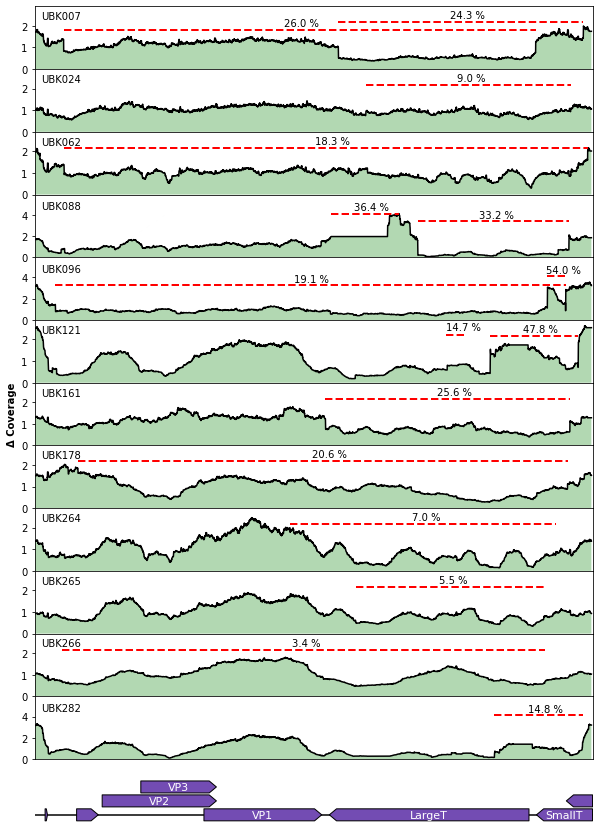

In [135]:
fig5 = plt.figure(figsize=(10,15))
ticks = [0, 1000, 2000, 3000, 4000, 5000]

# PLOT THE COVERAGE MAP
for i in range(0,12):    
    ax2 = fig5.add_subplot(13,1,i+1)
    ax2 = sns.lineplot(dfmerge.index, dfmerge[input_files[i]],data=dfmerge, color='k')
    ax2.set_xlim(0,5153)
    max_x = dfmerge[input_files[i]].max()
    #ax2.set_ylim(0,max_x*1.4)
    #ax2.set_ylim(0,5)
    x = int(xs[i+1])
    y = int(ys[i+1])
    location = x + ((y-x)/2) - 100
    if i == 12:
        #ax2.xaxis.tick_top()
        #ax2.xaxis.set_label_position('top')
        ax2.set_xticks(ticks)
        ax2.set_xlabel('Position', weight = 'bold')
    else:
        ax2.set_xticks(())
        ax2.set_xlabel('')
    if i == 6:
        ax2.set_ylabel('Δ Coverage', weight = 'bold')
    else:
        ax2.set_ylabel('')
    #ax2.legend(frameon=False, loc='upper left')
    
    label = str(percent[i+1]) + ' %'
    plt.fill_between(dfmerge.index, dfmerge[input_files[i]],facecolor='green', alpha=0.3, interpolate=True)
    #plt.plot([x,y],[(max_x*1.03),(max_x*1.03)],linestyle='dashed', color = 'red', linewidth = 2)
    #ax2.text(location, max_x*1.1, label)
    #plt.text(50,max_x*1.1,samples[i])

    if i in [3,4,11]:
        ax2.set_ylim(0,5.9)
        plt.text(60,4.5,samples[i])
        plt.plot([x,y],[4.1,4.1],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(location,4.4, label)
    else:
        ax2.set_ylim(0,2.9)
        plt.text(60,2.3,samples[i])
        plt.plot([x,y],[2.16,2.16],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(location,2.34, label)

    if i == 0:
        label = str(percent[13]) + ' %'
        plt.plot([int(xs[13]),int(ys[13])],[(max_x-0.2),(max_x-0.2)],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(2300, max_x, label)

    if i == 3:
        label = str(percent[14]) + ' %'
        plt.plot([int(xs[14]),int(ys[14])],[(max_x-0.7),(max_x-0.7)],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(4100, max_x-0.4, label) 
        
    if i == 4:
        label = str(percent[15]) + ' %'
        plt.plot([int(xs[15]),int(ys[15])],[(max_x-0.3),(max_x-0.3)],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(2400, max_x, label)

    if i == 5:
        label = str(percent[16]) + ' %'
        plt.plot([int(xs[16]),int(ys[16])],[(max_x-0.4),(max_x-0.4)],linestyle='dashed', color = 'red', linewidth = 2)
        ax2.text(3800, max_x-0.2, label)

plt.subplots_adjust(hspace=0)

# PLOT THE GENE MAP
ax3 = plt.subplot(13,1,13)
features=[
    GraphicFeature(start=97, end=119, strand=+1, color='#734CB3', thickness=12),
    GraphicFeature(start=388, end=588, strand=+1,color='#734CB3', thickness=12),
    GraphicFeature(start=624, end=1679, strand=+1, label='VP2',color='#734CB3', thickness=12),
    GraphicFeature(start=981, end=1679, strand=+1, label='VP3',color='#734CB3', thickness=12),
    GraphicFeature(start=1564, end=2652, strand=+1, label='VP1',color='#734CB3', thickness=12),
    GraphicFeature(start=2722, end=4566, strand=-1, label='LargeT',color='#734CB3', thickness=12),
    GraphicFeature(start=4911, end=5153, strand=-1, color='#734CB3', thickness=12),
    GraphicFeature(start=4635, end=5153, strand=-1,label='SmallT', color='#734CB3', thickness=12)]

record = GraphicRecord(sequence_length=5153, features=features)
record.plot(ax=ax3, figure_width=10, with_ruler=False, annotate_inline=True)

plt.savefig('FIG1A.png', dpi=600, facecolor='white')
#plt.show()

## Coverage map for JCV

In [97]:
# input data for JCV-292 coverage map
jcdf = pd.read_csv('UJC292_2.csv', index_col='Position')
jcdf = ((jcdf/jcdf.mean()))
jcdf

,Coverage
Position,
1,2.70
2,2.70
3,2.70
4,2.70
5,2.70
...,...
5121,2.68
5122,2.71
5123,2.72


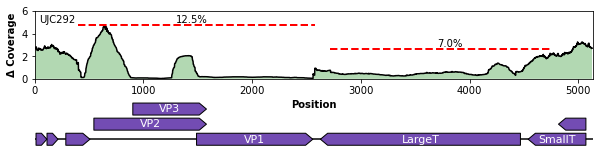

In [128]:
fig6 = plt.figure(figsize=(10,2.5))


# PLOT THE COVERAGE MAP UJC292
ax1 = fig6.add_subplot(2,1,1)
ax1 = sns.lineplot(jcdf.index, jcdf['Coverage'],data=jcdf, color='k')
ax1.set_ylabel('Δ Coverage', weight = 'bold')
ax1.set_xlabel('Position', weight = 'bold')
#ax1.set_xticks(())
#ax1.legend(frameon=False, loc='upper right')
max_x = jcdf["Coverage"].max()
ax1.set_xlim(0,5130)
ax1.set_ylim(0, max_x+0.5)
ax1.set_yticks([0,2,4,6])
# add junction annotations
plt.plot([402,2576],[max_x+0.1,max_x+0.1],linestyle='dashed', color = 'red', linewidth = 2)
ax1.text(1300, max_x+0.3, '12.5%')
plt.plot([2720,4739],[max_x-2,max_x-2],linestyle='dashed', color = 'red', linewidth = 2)
ax1.text(3700, max_x-1.8, '7.0%')
plt.fill_between(jcdf.index, jcdf['Coverage'],facecolor='green', alpha=0.3, interpolate=True)
plt.text(45,5,'UJC292')

# PLOT THE GENE MAP
ax3 = plt.subplot(2,1,2)
features=[
    GraphicFeature(start=13, end=113, strand=+1, color='#734CB3', thickness=12),
    GraphicFeature(start=114, end=215, strand=+1,color='#734CB3', thickness=12),
    GraphicFeature(start=287, end=509, strand=+1,color='#734CB3', thickness=12),
    GraphicFeature(start=545, end=1580, strand=+1, label='VP2',color='#734CB3', thickness=12),
    GraphicFeature(start=903, end=1580, strand=+1, label='VP3',color='#734CB3', thickness=12),
    GraphicFeature(start=1489, end=2558, strand=+1, label='VP1',color='#734CB3', thickness=12),
    GraphicFeature(start=2628, end=4467, strand=-1, label='LargeT', color='#734CB3', thickness=12),
    GraphicFeature(start=4817, end=5069, strand=-1, color='#734CB3', thickness=12),
    GraphicFeature(start=4538, end=5069, strand=-1, label='SmallT', color='#734CB3', thickness=12)]

record = GraphicRecord(sequence_length=5130, features=features)
record.plot(ax=ax3, figure_width=10, with_ruler=False, annotate_inline=True)

plt.subplots_adjust(hspace=0)

plt.savefig('FIG1B.png', dpi=600, facecolor='white')
plt.show()

## Coverage map for BKV-Kapa

In [107]:
# import files
kapa_input_files = []
path = os.listdir()
for file in path:
    if file.endswith("-kapa.csv"):
        kapa_input_files.append(file)    
kapa_input_files.sort()
print(kapa_input_files)
len(kapa_input_files)

['UBK007-kapa.csv', 'UBK086-kapa.csv', 'UBK094-kapa.csv', 'UBK096-kapa.csv']


4

In [108]:
# Create a list of files for loop later
kapa_list = []

for i in range(0,len(kapa_input_files)):
    kapadfname = 'df' + str(i)
    tempdf = pd.read_csv(kapa_input_files[i], index_col='Position')
    tempdf = tempdf.rename(columns={"Coverage": kapa_input_files[i]})
    #tempdf = tempdf.iloc[1000:,]
    tempdf_norm = ((tempdf/tempdf.mean()))
    kapa_list.append(tempdf_norm)
len(kapa_list)

4

In [109]:
# Merge the files into metadata table
kapadfmerge = pd.merge(kapa_list[0],kapa_list[1], left_index=True, right_index=True, how='outer')
for i in range(2,len(kapa_list)):
    kapadfmerge = pd.merge(kapadfmerge,kapa_list[i], left_index=True, right_index=True, how='outer')   
kapadfmerge.fillna(method='ffill', inplace=True)
kapadfmerge.head()

,UBK007-kapa.csv,UBK086-kapa.csv,UBK094-kapa.csv,UBK096-kapa.csv
Position,,,,
1,2.33,1.08,1.29,3.67
2,2.33,1.07,1.30,3.67
3,2.35,1.08,1.30,3.67
4,2.36,1.08,1.27,3.63
5,2.37,1.07,1.27,3.59


In [110]:
# Edit sample name
kapasamples = kapadfmerge.columns
kapasamples = kapasamples.str[:-9]
kapasamples

Index(['UBK007', 'UBK086', 'UBK094', 'UBK096'], dtype='object')

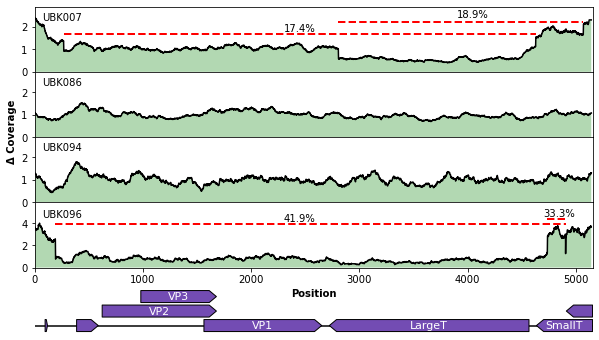

In [132]:
fig7 = plt.figure(figsize=(10,6))
ticks = [0, 1000, 2000, 3000, 4000, 5000]

# PLOT THE COVERAGE MAP
for i in range(0,len(kapa_input_files)):    
    ax5 = fig7.add_subplot(5,1,i+1)
    ax5 = sns.lineplot(kapadfmerge.index, kapadfmerge[kapa_input_files[i]],data=kapadfmerge, color='k')
    ax5.set_xlim(0,5153)
    max_x = kapadfmerge[kapa_input_files[i]].max()
    ax5.set_ylim(0,max_x*1.3)
    if i == 3:
        #ax2.xaxis.tick_top()
        #ax2.xaxis.set_label_position('top')
        ax5.set_xticks(ticks)
        ax5.set_xlabel('Position', weight = 'bold')
    else:
        ax5.set_xticks(())
        ax5.set_xlabel('')
    if i == 2:
        ax5.set_ylabel('                      Δ Coverage', weight = 'bold')
        ax5.set_ylim(0,2.9)
    else:
        ax5.set_ylabel('')
    #ax2.legend(frameon=False, loc='upper left')
    
    plt.fill_between(kapadfmerge.index, kapadfmerge[kapa_input_files[i]],facecolor='green', alpha=0.3, interpolate=True)
    
    if i in [0,1,2]:
        ax5.set_ylim(0,2.9)
        plt.text(70,2.3,kapasamples[i])
    else:
        ax5.set_ylim(0,5.9)
        plt.text(70,4.5,kapasamples[i])
    if i == 0:
        plt.plot([2805,5068],[2.2,2.2],linestyle='dashed', color = 'red', linewidth = 2)
        ax5.text(3900, 2.4, "18.9%")
        plt.plot([268,4628],[1.7,1.7],linestyle='dashed', color = 'red', linewidth = 2)
        ax5.text(2300, 1.8, "17.4%")
        
    if i == 3:
        plt.plot([4736,4905],[(max_x*1.1),(max_x*1.1)],linestyle='dashed', color = 'red', linewidth = 2)
        ax5.text(4700, max_x*1.16, "33.3%")
        plt.plot([192,4903],[(max_x-0.05),(max_x-0.05)],linestyle='dashed', color = 'red', linewidth = 2)
        ax5.text(2300, max_x*1.05, "41.9%")

    

# PLOT THE GENE MAP
ax5 = plt.subplot(5,1,5)
features=[
    GraphicFeature(start=97, end=119, strand=+1, color='#734CB3', thickness=12),
    GraphicFeature(start=388, end=588, strand=+1,color='#734CB3', thickness=12),
    GraphicFeature(start=624, end=1679, strand=+1, label='VP2',color='#734CB3', thickness=12),
    GraphicFeature(start=981, end=1679, strand=+1, label='VP3',color='#734CB3', thickness=12),
    GraphicFeature(start=1564, end=2652, strand=+1, label='VP1',color='#734CB3', thickness=12),
    GraphicFeature(start=2722, end=4566, strand=-1, label='LargeT',color='#734CB3', thickness=12),
    GraphicFeature(start=4911, end=5153, strand=-1, color='#734CB3', thickness=12),
    GraphicFeature(start=4635, end=5153, strand=-1, label='SmallT', color='#734CB3', thickness=12)]

record = GraphicRecord(sequence_length=5153, features=features)
record.plot(ax=ax5, figure_width=10, with_ruler=False, annotate_inline=True)

plt.subplots_adjust(hspace=0)
plt.savefig('FigureS2-kapa.png', dpi=600,facecolor='white')
plt.show()
